In [18]:
from cleanning_data import cleanning_data
from datetime import datetime

frame = cleanning_data.df
frame



,id,fecha_entrega,fecha_ultima,fecha_penultima,fecha_antepenultima,kms_ultima,kms_penultima,kms_antepenultima,dias_para_5000,source_file,fecha_entregasmpt,fecha_ultimampt,fecha_penultimampt,fecha_antepenultimampt
0,1,1900-01-01,2022-03-29,2021-11-03,1900-01-01,123344,115231,0,0,entrenamiento_IA_parte_2.csv,-2.208971e+09,1.420261e+09,-2.208971e+09,-2.208971e+09
1,2,1900-01-01,2021-09-27,2021-08-19,1900-01-01,112446,109473,0,0,entrenamiento_IA_parte_2.csv,-2.208971e+09,1.420261e+09,-2.208971e+09,-2.208971e+09
2,3,1900-01-01,2021-03-31,1900-01-01,1900-01-01,135976,0,0,0,entrenamiento_IA_parte_2.csv,-2.208971e+09,1.420261e+09,-2.208971e+09,-2.208971e+09
3,4,1900-01-01,2021-03-05,1900-01-01,1900-01-01,191772,0,0,0,entrenamiento_IA_parte_2.csv,-2.208971e+09,1.420261e+09,-2.208971e+09,-2.208971e+09
4,5,1900-01-01,2022-03-25,2022-03-11,1900-01-01,22,2,0,1,entrenamiento_IA_parte_2.csv,-2.208971e+09,1.420261e+09,-2.208971e+09,-2.208971e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11696,11697,1900-01-01,2020-01-03,2018-05-25,2017-01-24,82641,56205,37364,0,entrenamiento_IA_parte_6.csv,-2.208971e+09,1.420261e+09,-2.208971e+09,-2.208971e+09
11697,11698,1900-01-01,2016-07-02,2016-06-04,2015-07-07,10453,9786,4998,0,entrenamiento_IA_parte_6.csv,-2.208971e+09,1.420261e+09,-2.208971e+09,-2.208971e+09
11698,11699,1900-01-01,2015-12-21,1900-01-01,1900-01-01,163769,0,0,0,entrenamiento_IA_parte_6.csv,-2.208971e+09,1.420261e+09,-2.208971e+09,-2.208971e+09
11699,11700,1900-01-01,2018-02-07,2018-02-03,2016-07-30,28231,28139,16101,1,entrenamiento_IA_parte_6.csv,-2.208971e+09,1.420261e+09,-2.208971e+09,-2.208971e+09


In [19]:
for fecha in frame.fecha_entrega:
    frame["fecha_entregasmpt"] = datetime.fromisoformat(str(fecha)).timestamp()
    
for fecha in frame.fecha_ultima:
    frame["fecha_ultimampt"] = datetime.fromisoformat(str(fecha)).timestamp()
    
for fecha in frame.fecha_penultima:
    frame["fecha_penultimampt"] = datetime.fromisoformat(str(fecha)).timestamp()
    
for fecha in frame.fecha_antepenultima:
    frame["fecha_antepenultimampt"] = datetime.fromisoformat(str(fecha)).timestamp()
    
print(frame[["fecha_entregasmpt", "fecha_ultimampt", "fecha_penultimampt", "fecha_antepenultimampt"]])

X = frame[["fecha_entregasmpt", "fecha_ultimampt", "fecha_penultimampt", "fecha_antepenultimampt", "kms_ultima", "kms_penultima", "kms_antepenultima"]]
y = frame["dias_para_5000"]

       fecha_entregasmpt  fecha_ultimampt  fecha_penultimampt  \
0           1.420261e+09     1.420261e+09       -2.208971e+09   
1           1.420261e+09     1.420261e+09       -2.208971e+09   
2           1.420261e+09     1.420261e+09       -2.208971e+09   
3           1.420261e+09     1.420261e+09       -2.208971e+09   
4           1.420261e+09     1.420261e+09       -2.208971e+09   
...                  ...              ...                 ...   
11696       1.420261e+09     1.420261e+09       -2.208971e+09   
11697       1.420261e+09     1.420261e+09       -2.208971e+09   
11698       1.420261e+09     1.420261e+09       -2.208971e+09   
11699       1.420261e+09     1.420261e+09       -2.208971e+09   
11700       1.420261e+09     1.420261e+09       -2.208971e+09   

       fecha_antepenultimampt  
0               -2.208971e+09  
1               -2.208971e+09  
2               -2.208971e+09  
3               -2.208971e+09  
4               -2.208971e+09  
...                       .

In [20]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler
import pandas as pd


ct = ColumnTransformer(
    [
        ("scale", StandardScaler(), make_column_selector(dtype_include=np.int64)),
        ("scale2", StandardScaler(), make_column_selector(dtype_include=np.float64))
    ],
    remainder="drop"
)
ct.fit_transform(frame)

data_frame_scalado = pd.DataFrame(ct.fit_transform(frame), columns=ct.get_feature_names_out())

data_frame_scalado

,scale__id,scale__kms_ultima,scale__kms_penultima,scale__kms_antepenultima,scale__dias_para_5000,scale2__fecha_entregasmpt,scale2__fecha_ultimampt,scale2__fecha_penultimampt,scale2__fecha_antepenultimampt
0,-1.352831,0.002502,0.020338,-0.012636,-0.916934,0.0,0.0,0.0,0.0
1,-1.352776,0.000575,0.018496,-0.012636,-0.916934,0.0,0.0,0.0,0.0
2,-1.352721,0.004735,-0.016538,-0.012636,-0.916934,0.0,0.0,0.0,0.0
3,-1.352667,0.014599,-0.016538,-0.012636,-0.916934,0.0,0.0,0.0,0.0
4,-1.352612,-0.019299,-0.016537,-0.012636,1.090591,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
231385,-0.712171,-0.004694,0.001449,-0.000658,-0.916934,0.0,0.0,0.0,0.0
231386,-0.712116,-0.017455,-0.013406,-0.011034,-0.916934,0.0,0.0,0.0,0.0
231387,-0.712061,0.009648,-0.016538,-0.012636,-0.916934,0.0,0.0,0.0,0.0
231388,-0.712007,-0.014312,-0.007533,-0.007475,1.090591,0.0,0.0,0.0,0.0


In [21]:
from sklearn.model_selection import train_test_split

X = data_frame_scalado[["scale2__fecha_entregasmpt", "scale2__fecha_ultimampt", "scale2__fecha_penultimampt", "scale2__fecha_antepenultimampt", "scale__kms_ultima", "scale__kms_penultima", "scale__kms_antepenultima"]]
y = frame["dias_para_5000"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

x_train

,scale2__fecha_entregasmpt,scale2__fecha_ultimampt,scale2__fecha_penultimampt,scale2__fecha_antepenultimampt,scale__kms_ultima,scale__kms_penultima,scale__kms_antepenultima
214183,0.0,0.0,0.0,0.0,-0.011425,-0.016538,-0.012636
173080,0.0,0.0,0.0,0.0,-0.015126,-0.016538,-0.012636
203811,0.0,0.0,0.0,0.0,-0.007722,0.002620,0.005870
102356,0.0,0.0,0.0,0.0,-0.014949,-0.008657,-0.006853
128434,0.0,0.0,0.0,0.0,-0.016829,-0.016538,-0.012636
...,...,...,...,...,...,...,...
215254,0.0,0.0,0.0,0.0,-0.003540,0.009946,0.011829
221733,0.0,0.0,0.0,0.0,0.032888,-0.016538,-0.012636
105395,0.0,0.0,0.0,0.0,-0.012200,-0.016538,-0.012636
13133,0.0,0.0,0.0,0.0,-0.013939,-0.010102,-0.008700


In [22]:
from sklearn.svm import SVC
modelo = SVC(
    # --------------------------------------------------------------------------
    # Regularization parameter. The strength of the regularization is inversely
    # proportional to C. Must be strictly positive. The penalty is a squared l2
    # penalty.
    C=1,
    # --------------------------------------------------------------------------
    # Specifies the kernel type to be used in the algorithm. If none is given,
    # ‘rbf’ will be used.
    kernel="linear",
    # --------------------------------------------------------------------------
    # Degree of the polynomial kernel function (‘poly’). Must be non-negative.
    # Ignored by all other kernels.
    degree=3,
    # --------------------------------------------------------------------------
    # Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
    # * if gamma='scale' (default) is passed then it uses
    #   1 / (n_features * X.var()) as value of gamma,
    # * if ‘auto’, uses 1 / n_features
    # * if float, must be non-negative.
    gamma="scale",
    # --------------------------------------------------------------------------
    # Independent term in kernel function. It is only significant in ‘poly’ and
    # ‘sigmoid’.
    coef0=0.0,
    # --------------------------------------------------------------------------
    # Whether to enable probability estimates. This must be enabled prior to
    # calling fit, will slow down that method as it internally uses 5-fold
    # cross-validation, and predict_proba may be inconsistent with predict.
    probability=False,
    # --------------------------------------------------------------------------
    # Tolerance for stopping criterion.
    tol=1e-3,
    # --------------------------------------------------------------------------
    # Set the parameter C of class i to class_weight[i]*C for SVC. If not
    # given, all classes are supposed to have weight one. The “balanced” mode
    # uses the values of y to automatically adjust weights inversely
    # proportional to class frequencies in the input data as
    # n_samples / (n_classes * np.bincount(y)).
    class_weight=None,
    # --------------------------------------------------------------------------
    # Hard limit on iterations within solver, or -1 for no limit.
    max_iter=-1,
    # --------------------------------------------------------------------------
    # Whether to return a one-vs-rest (‘ovr’) decision function of shape
    # (n_samples, n_classes) as all other classifiers, or the original
    # one-vs-one (‘ovo’) decision function of libsvm which has shape
    # (n_samples, n_classes * (n_classes - 1) / 2). However, note that
    # internally, one-vs-one (‘ovo’) is always used as a multi-class strategy
    # to train models; an ovr matrix is only constructed from the ovo matrix.
    # The parameter is ignored for binary classification.
    decision_function_shape="ovr",
    # --------------------------------------------------------------------------
    # Controls the pseudo random number generation for shuffling the data for
    # probability estimates. Ignored when probability is False. Pass an int
    # for reproducible output across multiple function calls.
    random_state=None,
)
modelo.fit(x_train,y_train)

print(modelo.score(x_train, y_train))

yf = modelo.predict(x_test)

0.5438190315669895


In [23]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(
confusion_matrix(
    # -------------------------------------------------------------------------
    # Ground truth (correct) target values.
    y_true=y_test,
    # -------------------------------------------------------------------------
    # Estimated targets as returned by a classifier.
    y_pred=yf,
    # -------------------------------------------------------------------------
    # List of labels to index the matrix.
    labels=None,
    # -------------------------------------------------------------------------
    # Normalizes confusion matrix over the true (rows), predicted (columns)
    # conditions or all the population.
    # 'true', 'pred', 'all'
    normalize=None,
)
)


,0,1
0,37622,1
1,31794,0


[[37622     1]
 [31794     0]]


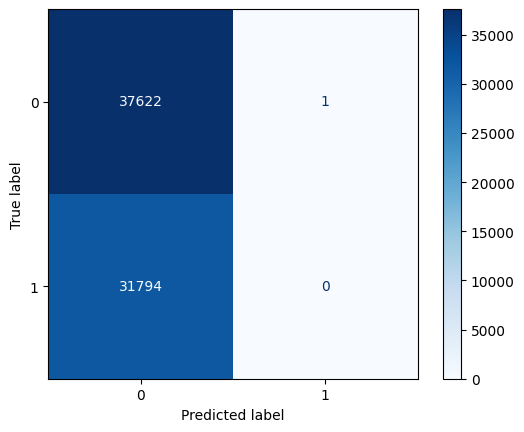

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay


disp = ConfusionMatrixDisplay.from_estimator(
    modelo,
    x_test,
    y_test,
    cmap=plt.cm.Blues,
    normalize=None,
)

print(disp.confusion_matrix)

plt.show()